# Bank Marketing project

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Loading the data
train = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [3]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Here, 'subscribed' is  the taget variable

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [9]:
train.shape

(31647, 18)

In [10]:
test.shape

(13564, 17)

From here, we see that seventeen features are same but only subscribed variable is diffrent in train data and subscribed variable is our target variable.

# Exploring The Data

In [11]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [12]:
# checking the missing values in train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [13]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [14]:
# Checking the missing values in test dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Analysis of 'subscribed' variable

In [15]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

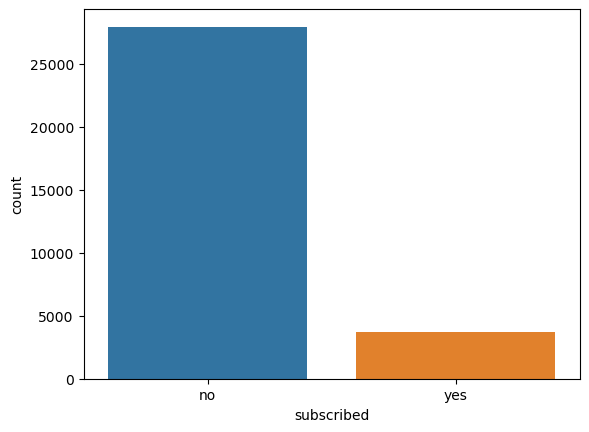

In [16]:
sns.countplot(data=train, x='subscribed')


In [17]:
# Normalizing the frequency table of 'subscribed' variable
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

From above analysis, we can see that only 3,715 people have subscribed out of 31647 which are approximately 12%.

# Analysing the 'job' variable

In [18]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<Axes: >

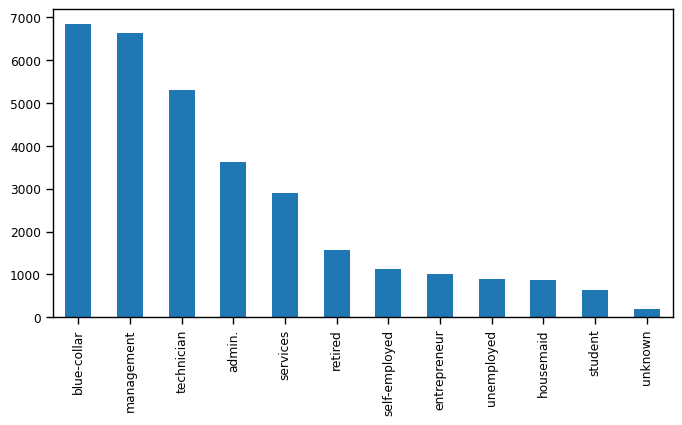

In [19]:
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(8,4))


We can see that most of the clients belong to blue-collar job and students are least as they do not make term deposit in general.

# Analysing the 'marital' status

In [20]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

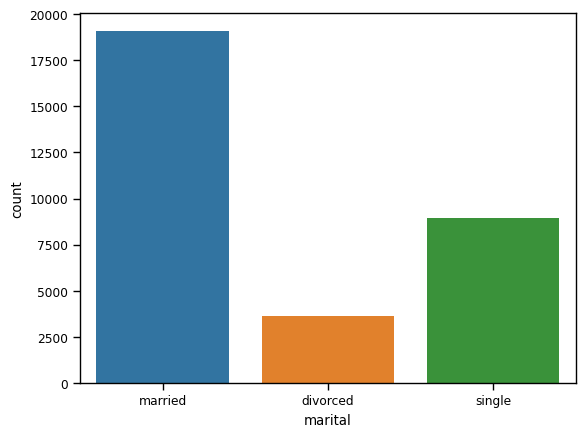

In [21]:
sns.countplot(data=train, x= 'marital')

<Axes: xlabel='marital', ylabel='count'>

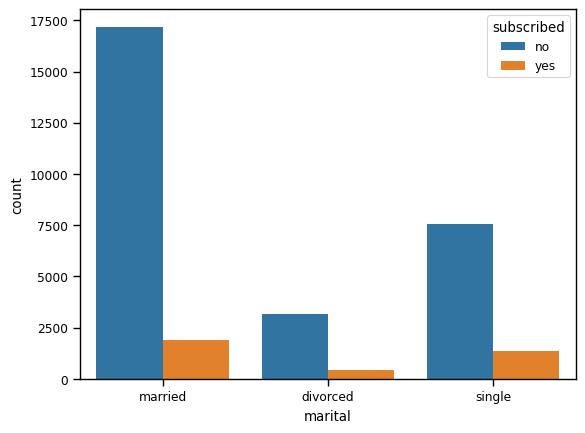

In [22]:
sns.countplot(data=train, x='marital',hue='subscribed')

# Analysis of 'age' variable

<Axes: xlabel='age', ylabel='Density'>

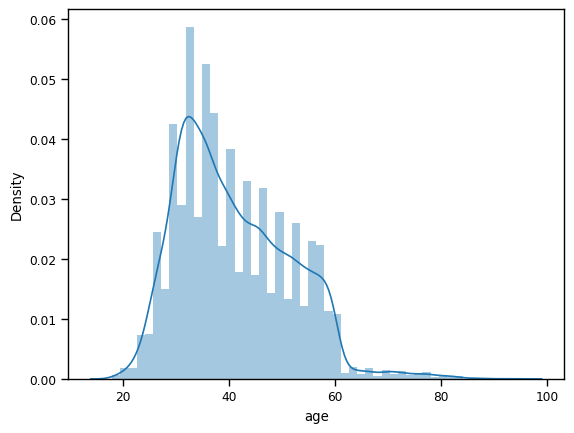

In [23]:
sns.distplot(train['age'])

From here, we can see that most of the clients fall in the age group of 20-60.

# Bivariate Analysis

In [24]:
# job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))


subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [25]:
job=pd.crosstab(train['job'],train['subscribed'])
job_norm= job.div(job.sum(1).astype(float),axis=0)
job_norm
#job_norm.plot.bar(stacked=True,figsize=(8,6))

subscribed,no,yes
job,,
admin.,0.875516,0.124484
blue-collar,0.928530,0.071470
entrepreneur,0.915675,0.084325
housemaid,0.909611,0.090389
management,0.860973,0.139027
retired,0.770013,0.229987
self-employed,0.875334,0.124666
services,0.912504,0.087496
student,0.713386,0.286614


<Axes: xlabel='job'>

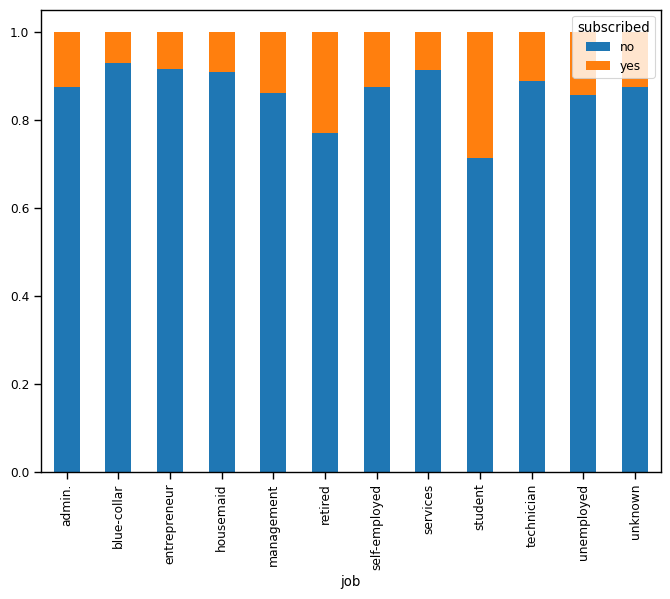

In [26]:
job_norm.plot.bar(stacked=True,figsize=(8,6))

From the above graph we can see that students and retired people have higher chances of subscribing to term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit. 

In [27]:
# Marital status vs subscribed
pd.crosstab(train['marital'],train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [28]:
marital= pd.crosstab(train['marital'],train['subscribed'])
marital_norm=marital.div(marital.sum(1).astype(float),axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


<Axes: xlabel='marital'>

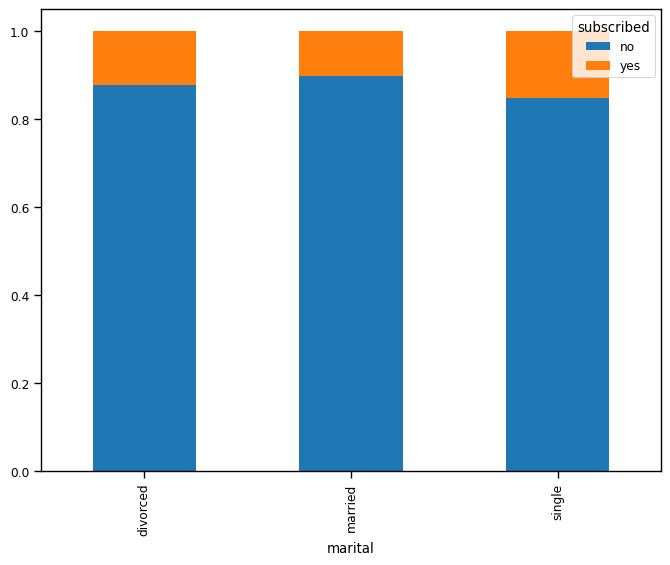

In [29]:
marital_norm.plot.bar(stacked=True,figsize=(8,6))

From the above analysis we can see that there is not so much difference in the subscrition of term deposit in term of marital staus. Here, the single clients are more which have subscribed to term deposit.

In [30]:
# default vs subscription
pd.crosstab(train['default'],train['subscribed'])


subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [31]:
dflt=pd.crosstab(train['default'],train['subscribed'])
dflt_norm= dflt.div(dflt.sum(1).astype(float),axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

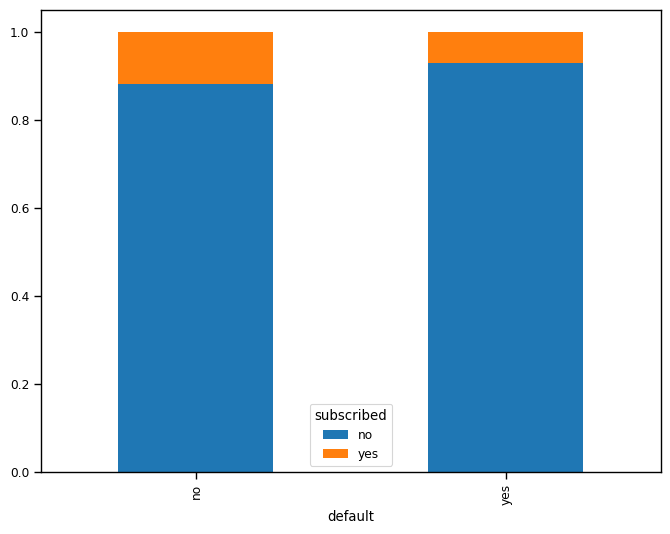

In [32]:
dflt_norm.plot.bar(stacked= True,figsize=(8,6))

From above we can see that the clients have no previous default have more chances of subscrition to term deposit rather than the other clients.

In [33]:
# In order to see correlation matrix first we have to change the dtype of subscribed from object to int type.
# converting the target vsrisbles into 0s and 1s.
train['subscribed'].replace('no',0,inplace= True)
train['subscribed'].replace('yes',1,inplace=True)
train['subscribed']


0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [34]:
# Correlation matrix
corr_tr=train.corr()
corr_tr

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

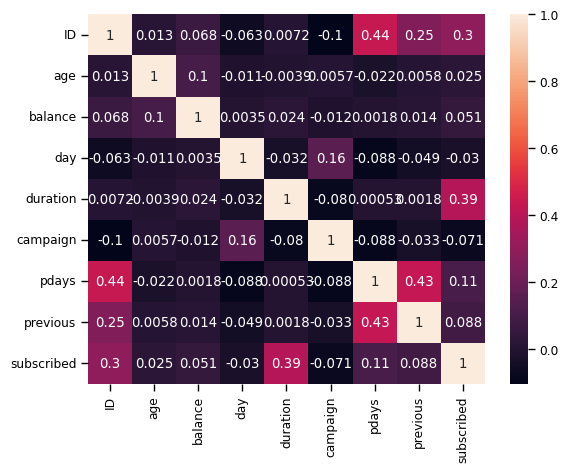

In [35]:
fig,ax=plt.subplots()
fig.set_size_inches=(30,20)
sns.heatmap(corr_tr,annot=True)

From above we can see that the duration of call is highly correlated with the target variable. As the duration of call is more there are higher chances that the client is showing interest in term deposit and hence there are higher chances that the client will subscribe to term deposit. 

# Model Building

In [36]:
target=train['subscribed']
train=train.drop('subscribed',axis=1)
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure


In [37]:
# generating dummy values on trsin dataset
train=pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Splitting the data into train and validation set such as to validate the results of our model on the valdation set keepimg 20% of dataset as our validation set and the rest as training set.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_val,y_train,y_val= train_test_split(train,target,test_size=0.2,random_state=12)


Since it is a classification problem, so I will be using logistic regression model for this problem.


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
lreg= LogisticRegression()

In [42]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [43]:
pred=lreg.predict(x_val)

In [44]:
# calculating the accuracy score
accuracy_score(y_val,pred)

0.8913112164296998

We got accuracy score of around 89%.

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# creating an object of DecisionTreeClassifier
dtc= DecisionTreeClassifier(max_depth=4,random_state=0)

In [47]:
# fitting the model
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [48]:
predict=dtc.predict(x_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
# calculating the accuracy
accuracy_score(y_val,predict)


0.9042654028436019

We got an accuracy of mare than 90% 0n the validation set. 

Let's now make the pridiction on test dataset.

In [50]:
test=pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [53]:
test_pred=dtc.predict(test)
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

Finally we will save these predictions into a csv file.

In [54]:
predictions= pd.DataFrame()

In [58]:
predictions['ID']=test['ID']
predictions['subscribed']= test_pred

In [59]:
predictions['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

Since the target variable is yes or no, we will convert it into 1 and 0 in the predictions to yes and no respectively.

In [60]:
predictions['subscribed'].replace(0,'no',inplace=True)
predictions['subscribed'].replace(1,'yes',inplace=True)
predictions['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [ ]:
predictions.to_csv('prediction file.csv',header=True,index=False)